<a href="https://colab.research.google.com/github/ameri2pu-bit/Herramientas-de-programacion/blob/main/HRMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wbdata pandas numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.2.1 which is incompatible.
bigframes 2.21.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


KeyboardInterrupt: 

                pib  inflacion  desempleo
count  1.900000e+01  18.000000  19.000000
mean   1.996873e+12   3.289087   5.797842
std    6.625054e+12   1.830372   2.233308
min    1.969398e+10  -0.413459   2.219000
25%    6.531490e+10   2.101177   4.340000
50%    1.242822e+11   3.568818   6.061000
75%    5.259044e+11   4.620107   7.741000
max    2.918489e+13   6.609086   9.608000

Top 5 PIB:
          country           pib  inflacion  desempleo
19  United States  2.918489e+13   2.949525      4.106
3          Canada  2.241253e+12   2.381584      6.450
2          Brazil  2.179412e+12   4.367464      7.634
12         Mexico  1.852723e+12   4.722256      2.711
0       Argentina  6.332667e+11        NaN      7.876

Top 5 Inflación:
      country           pib  inflacion  desempleo
5    Colombia  4.185420e+11   6.609086      9.608
1     Bolivia  4.966830e+10   5.099766      3.091
18    Uruguay  8.096151e+10   4.849144      8.401
12     Mexico  1.852723e+12   4.722256      2.711
13  Nicaragua  1.9

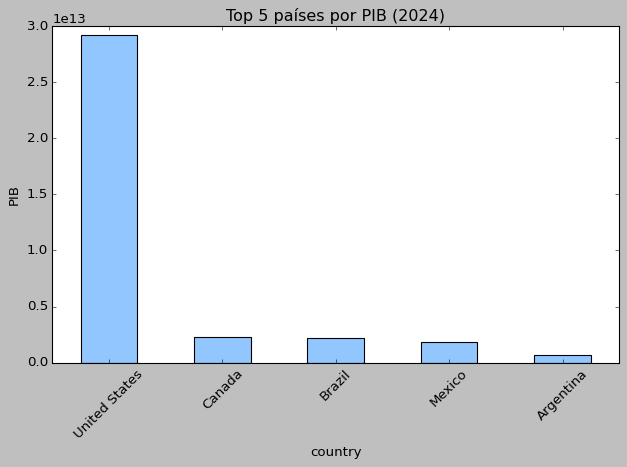

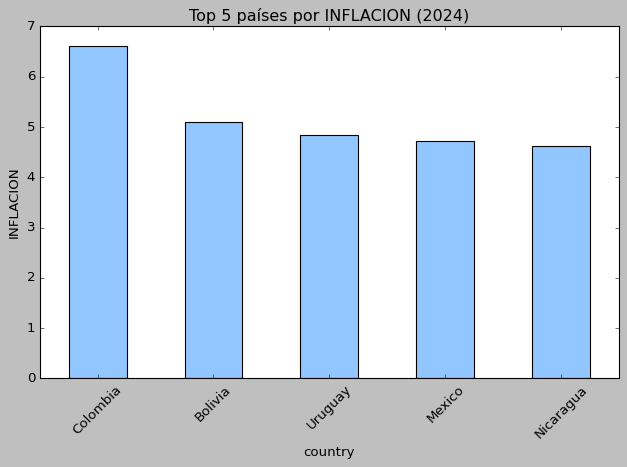

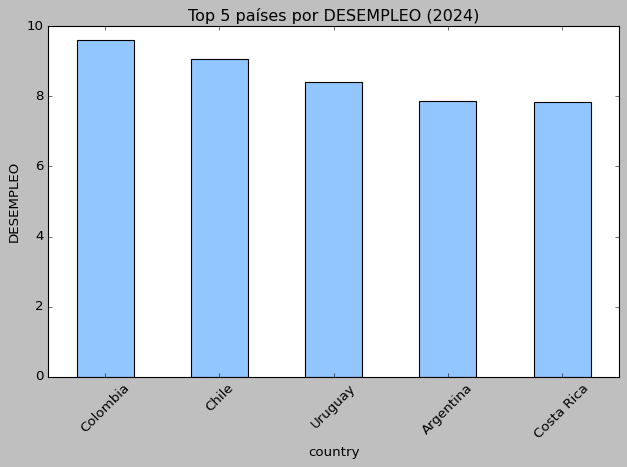


Promedios de los indicadores:
Pib: 1,996,872,905,447.41
Inflacion: nan
Desempleo: 5.80


In [11]:
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

class Pais:
    """Clase que representa un país y sus indicadores económicos."""
    def __init__(self, nombre, pib, inflacion, desempleo):
        self.nombre = nombre
        self.pib = pib
        self.inflacion = inflacion
        self.desempleo = desempleo

    def __repr__(self):
        return f"{self.nombre}: PIB={self.pib}, Inflación={self.inflacion}, Desempleo={self.desempleo}"

class WDIClient:
    """Cliente para descargar y analizar datos económicos del Banco Mundial."""
    def __init__(self, indicadores, paises, year):
        self.indicadores = indicadores
        self.paises = paises
        self.year = str(year)
        self.df = self._descargar_datos()
        self.paises_obj = self._crear_paises()

    def _descargar_datos(self):
        """Descarga los datos del Banco Mundial y los retorna como DataFrame."""
        data = wbdata.get_dataframe(
            self.indicadores,
            country=self.paises,
            date=self.year
        ).reset_index()
        data = data.dropna(subset=["pib"])
        return data

    def _crear_paises(self):
        """Crea una lista de objetos Pais usando list comprehension."""
        return [
            Pais(row['country'], row['pib'], row['inflacion'], row['desempleo'])
            for _, row in self.df.iterrows()
        ]

    def resumen(self):
        """Devuelve un resumen estadístico del DataFrame."""
        return self.df.describe()

    def top(self, columna, n=5):
        """Devuelve el top n de países según la columna indicada."""
        return self.df.sort_values(columna, ascending=False).head(n)

    def grafico_top(self, columna, n=5):
        """Muestra un gráfico de barras del top n de países según la columna indicada."""
        plt.style.use('seaborn-v0_8-pastel')
        top = self.top(columna, n)
        top.plot(x="country", y=columna, kind="bar", legend=False)
        plt.title(f"Top {n} países por {columna.upper()} ({self.year})")
        plt.ylabel(columna.upper())
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Parámetros
indicadores = {
    "NY.GDP.MKTP.CD": "pib",
    "FP.CPI.TOTL.ZG": "inflacion",
    "SL.UEM.TOTL.ZS": "desempleo"
}
paises = [
    "AR","BO","BR","CL","CO","CR","CU","DO","EC","SV","GT","HN","MX","NI","PA","PY","PE","UY","VE",
    "CA","US"#Puede incluir los paises que desee con el codigo ISO_O3 del país
]

cliente = WDIClient(indicadores, paises, 2024)

# Mostrar resumen y tops
print(cliente.resumen())
print("\nTop 5 PIB:")
print(cliente.top("pib"))
print("\nTop 5 Inflación:")
print(cliente.top("inflacion"))
print("\nTop 5 Desempleo:")
print(cliente.top("desempleo"))

# Mostrar gráficos en Colab
cliente.grafico_top("pib", 5)
cliente.grafico_top("inflacion", 5)
cliente.grafico_top("desempleo", 5)

# Calcular promedios
promedios = {col: sum([getattr(p, col) for p in cliente.paises_obj]) / len(cliente.paises_obj)
             for col in ['pib', 'inflacion', 'desempleo']}
print("\nPromedios de los indicadores:")
for k, v in promedios.items():
    print(f"{k.capitalize()}: {v:,.2f}")